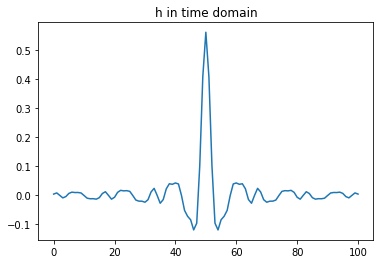

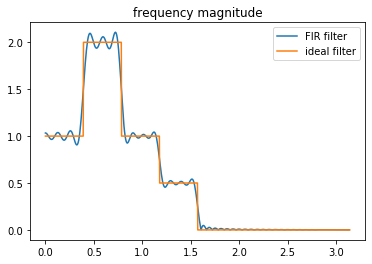

In [3]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile as reader
N=101
L=1000
M=(N-1)/2
ws=np.linspace(0,np.pi,L)
As1=np.zeros(L)
for i in range(int(L)):
    if ws[i]>=0  and  ws[i]<np.pi/8:
        As1[i]=1
    elif ws[i]>=np.pi/8  and ws[i]<np.pi/4:
        As1[i]=2
    elif ws[i]>=np.pi/4  and ws[i]<(np.pi)*3/8:
        As1[i]=1
    elif ws[i]>=(np.pi)*3/8  and ws[i]<np.pi/2:
        As1[i]=0.5
        
def FIR(N,L,ws,As):
    M=int((N-1)/2)
    F = np.ones((L,M+1))
    h = np.zeros(N)
    
    for i in range(int(L)):
        for j in range(int(M)):
            F[i][j] = 2*np.cos(ws[i]*(M-j))
        
        F[i][M] = 1
            
   
    f= np.linalg.pinv(F)
  
    h0 = np.dot(f,As)
    
    for i in range(0,M):
        h[i]=h0[i]
    for i in range(M,N):
        h[i]=h0[M-1-i]
    return h

h1=FIR(N,L,ws,As1)


freq, y1 = signal.freqz(h1)
fig = plt.figure()
plt.plot(h1)
plt.title('h in time domain')


fig = plt.figure()
plt.plot(freq,abs(y1),label ='FIR filter')

plt.plot(ws,As1,label ='ideal filter')
plt.title('frequency magnitude')
plt.legend()
plt.show()


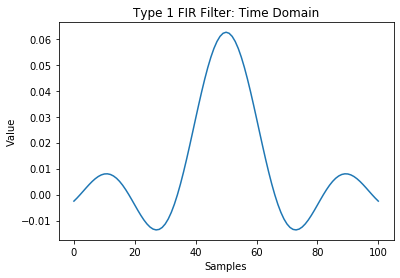

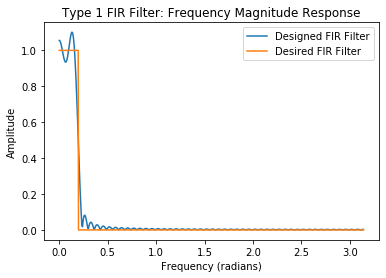

In [4]:
#3 
As2=np.zeros(L)
for i in range(int(L)):
    if ws[i]>=0  and  ws[i]<np.pi/16:
        As2[i]=1
        
h2=FIR(N,L,ws,As2)

y2=np.fft.fft(h2)
freq = np.fft.fftfreq(len(h2))
freq=freq[0:int(M)]
freq=freq*np.pi*2
y2=abs(y2[0:int(M)])
# fig = plt.figure()

# plt.title('h in time domain')

# fig = plt.figure()
# plt.plot(freq,y2,label ='FIR filter')

# plt.plot(ws,As2,label ='ideal filter')
# plt.title('frequency magnitude')
# plt.legend()
# plt.show()

fig1=plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(h2)
ax1.set_title("Type 1 FIR Filter: Time Domain")
ax1.set_xlabel("Samples")
ax1.set_ylabel("Value")

freq, f2 = signal.freqz(h2)

fig2=plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(freq, abs(f2), label="Designed FIR Filter")
ax2.plot(ws, As2, label="Desired FIR Filter")
ax2.set_title("Type 1 FIR Filter: Frequency Magnitude Response")
ax2.set_xlabel("Frequency (radians)")
ax2.set_ylabel("Amplitude")
ax2.legend()


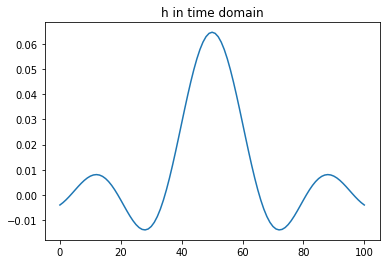

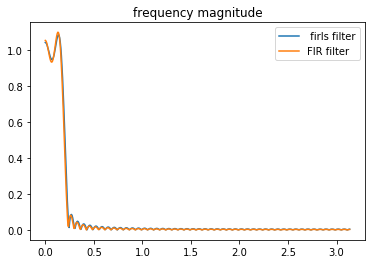

In [30]:
# 4 
from scipy import signal
bands=(0,1/16,1/15,1)
desired=(1,1,0,0)

fir_firls = signal.firls(101,bands, desired) #default fs=2



freq,y_firls= signal.freqz(fir_firls)
fig = plt.figure()
plt.plot(fir_firls)
plt.title('h in time domain')

fig = plt.figure()
plt.plot(freq,abs(y_firls),label =' firls filter')


plt.plot(freq, abs(f2),label ='FIR filter')
plt.title('frequency magnitude')
plt.legend()
plt.show()

In [5]:
#5     After filtering, the music sound volume decreases a lot, and vocal sound becomes smaller, 
#      and some higher frequency parts are eliminated
path='F:\lecture document\ECE 4250 signal\Corcovado.wav'
fscor,cor=reader.read(path)
#limit to left ear

cor0=cor[:,0]
cor1=cor[:,1]



cor0_filt=np.convolve(cor0,h2)
cor1_filt=np.convolve(cor1,h2)
cor0_filt=np.real((cor0_filt))
cor0_filt=cor0_filt.astype(np.int16)
print(cor1.shape)
print(cor0_filt.shape)

print(fscor)

#reader.write('F:\lecture document\ECE 4250 signal\cor0_filt.wav',fscor,cor0_filt)


# ycor0_filt=np.fft.fft(cor0_filt)
# fig = plt.figure()
# plt.plot(ycor0_filt)

# fig = plt.figure()
# ycor0=np.fft.fft(cor0)
# plt.plot(ycor0)

(11221103,)
(11221203,)
44100


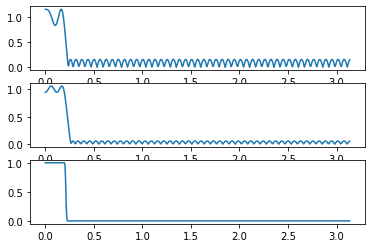

In [6]:
#6
from scipy import signal
import matplotlib.pyplot as plt
fs = 2       # Sample rate, Hz
cutoff = 1/16    # Desired cutoff frequency, Hz
trans_width = 1/100  # Width of transition from pass band to stop band, Hz
numtaps = 101     # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1])

#The ripples in remez is much more evident compared with least squares filter

#7
cor0_filt_remez=np.convolve(cor0,taps)
cor1_filt_remez=np.convolve(cor1,taps)
#8
trans_width1 = 1/50
taps1 = signal.remez(numtaps, [0, cutoff, cutoff + trans_width1, 0.5*fs], [1, 0], Hz=fs)
w1, h1 = signal.freqz(taps1, [1])
numtaps2 = 1001 
taps2 = signal.remez(numtaps2, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w2, h2 = signal.freqz(taps2, [1])

fig = plt.figure()
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
ax1.plot(w,abs(h))
ax2.plot(w1,abs(h1)) #When I increse the transition region, the ripples are smaller and the transition time is longer 
ax3.plot(w2,abs(h2))  #When I increase the number of filter taps, the ripples are smaller and closer to the ideal filter, the response is more flat

In [7]:
#7   After filtering, the music sound volume decreases a lot, and vocal sound becomes smaller, 
#      and some higher frequency parts are eliminated. But due to more ripples in higher frequency,
#      the decrease of higher frequency part is a little smaller than the lease square filter

cor0_filt_rem=np.convolve(cor0,taps)
cor1_filt_rem=np.convolve(cor1,taps)
print(cor0_filt_rem.shape)
print(cor0.shape)
cor0_filt_rem=np.real((cor0_filt_rem))
cor0_filt_rem=cor0_filt_rem.astype(np.int16)

#reader.write('F:\lecture document\ECE 4250 signal\cor0_filt_rem.wav',fscor,cor0_filt_rem)
#reader.write('F:\lecture document\ECE 4250 signal\cor0_filt_rem.wav',fscor,cor0_filt_rem)

(11221203,)
(11221103,)


C:\Users\zzj\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'frequency spectrum of filtered music')

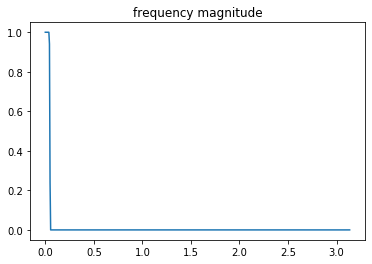

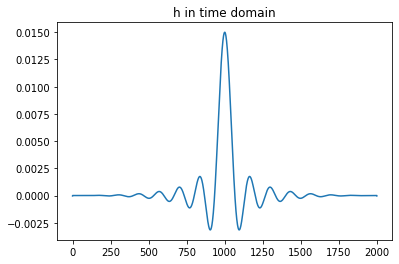

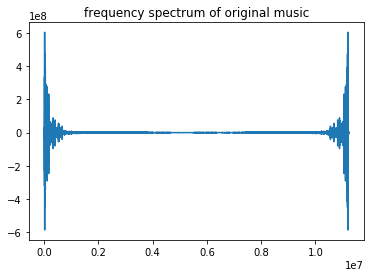

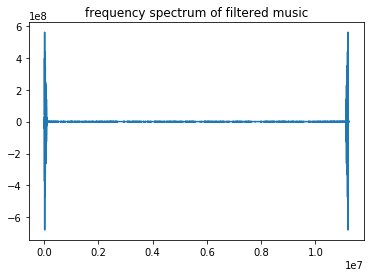

In [8]:

#9  I choose remez with enough points (2001) and small cutoff frequency(pi/80),small transition width(pi/200). 
#   Finally I can get rid of vocal sounds(higher frequency) and only keep the bass instrument
#   bass frequency around 500Hz, get cutoff frequency around 500Hz(cutofff_requency*fs ), too
trans_width3 = 1/200
cutoff3 = 1/80  
cutfreq=cutoff3*fscor
numtaps3=2001
taps3 = signal.remez(numtaps3, [0, cutoff3, cutoff3 + trans_width3, 0.5*fs], [1, 0], Hz=fs)
w3, h3 = signal.freqz(taps3, [1])
cor0_filt_remez3=np.convolve(cor0,taps3)
cor1_filt_remez3=np.convolve(cor1,taps3)

w3, h3 = signal.freqz(taps3, [1])

cor0_filt_remez3=np.real((cor0_filt_remez3))
cor0_filt_remez3=cor0_filt_remez3.astype(np.int16)
#reader.write('F:\lecture document\ECE 4250 signal\cor0_filt_rem3.wav',fscor,cor0_filt_remez3)

fig = plt.figure()
plt.plot(w3,abs(h3))
plt.title('frequency magnitude')

cor0_filt_remez3=np.real((cor0_filt_remez3))
cor0g = plt.figure()
plt.plot(taps3)
plt.title('h in time domain')


fig = plt.figure()
ycor0=np.fft.fft(cor0)
plt.plot(ycor0)
plt.title('frequency spectrum of original music')

ycor0_filt_remez3=np.fft.fft(cor0_filt_remez3)
fig = plt.figure()
plt.plot(ycor0_filt_remez3)
plt.title('frequency spectrum of filtered music')

